In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

# Linear Regression

## Generate dataset

In [3]:
x = np.random.uniform(0, 5, 1000)
a = 1/2
b = 3
y = a*x + b + np.random.normal(0, 1, size=x.size)

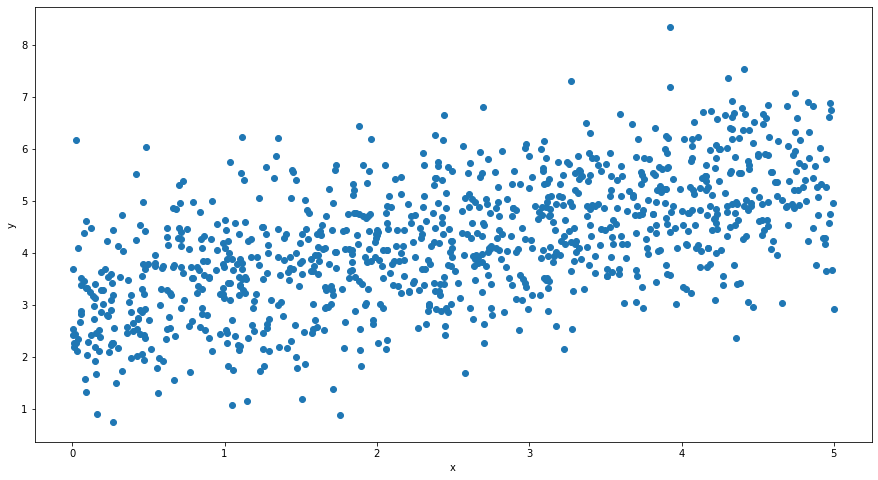

In [4]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
# from sklearn import datasets

In [6]:
# x, y = datasets.make_regression(n_samples=1000, n_features=1, noise=15, random_state=42)

In [7]:
# plt.scatter(x, y)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

In [8]:
def add_bias(x):
    return np.array([np.array([1, val]) for val in x])

In [9]:
X = add_bias(x)
X.shape, y.shape

((1000, 2), (1000,))

## Define model

<span style="color:blue"> Prediction function </span> $h_\theta(X) = \theta^Tx$:

In [10]:
def predict(X, theta):
    return np.dot(X, theta)

<span style="color:blue"> Cost function </span> as normalized sum of errors on the dataset: $J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^m(y - h_\theta(X))^2$

In [11]:
def compute_cost(X, y, theta):
    return sum((y - predict(X, theta))**2) / (2 * len(X))

In [12]:
def prediction_line(x, y, w):
    extremes = np.array([np.min(x), np.max(x)])
    line = w[0] + extremes * w[1]
    plt.plot(extremes, line, 'r-')
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

<span style="color:blue"> Simple gradient descent algorithm: </span>

$\theta = \theta - \alpha \nabla J(\theta)$

$\nabla J(\theta) = -\frac{1}{m}\sum_m(y - h_\theta(X))X$

In [13]:
def gradientDescent(X, y, init = 1, alpha = 0.0001, iters = 100):
    theta = np.ones_like(X[0]) * init # init theta with any scalar or vector
    cost = [compute_cost(X, y, theta)]
    m = len(X)
    for i in range(iters):
        cost.append(compute_cost(X, y, theta))
        theta = theta + alpha * 1/m * (np.sum((y - predict(X, theta)) * X.T, axis = 1)) 
    return theta, np.array(cost)

In [14]:
w, cost = gradientDescent(X, y, init = 1, alpha=0.1, iters=250)

## Predictions

In [15]:
print("Model's cost: ", compute_cost(X, y, w))
print("Calculated weights: ", w)

Model's cost:  0.48363965056304214
Calculated weights:  [2.94404682 0.50822635]


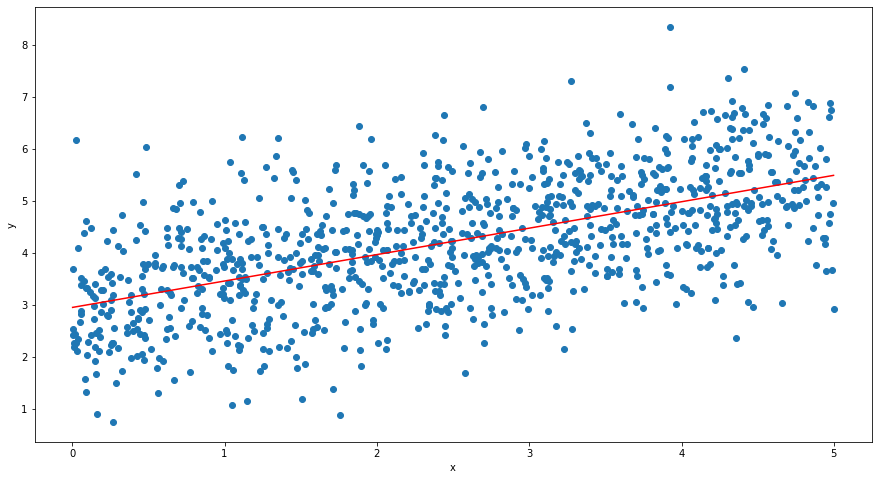

In [16]:
prediction_line(x, y, w)

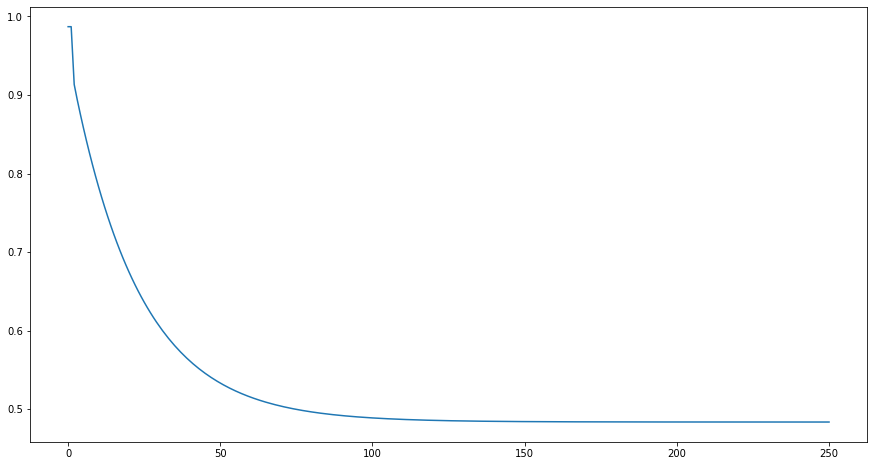

In [17]:
plt.plot(cost)

# Logistic regression

# Generate dataset

In [18]:
# X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
# X = (X - X.min())/(X.max()-X.min())

In [19]:
mean1 = [-1/2, 2]
cov1 = [[1, 0], [0, 1]]
x1 = np.random.multivariate_normal(mean1, cov1, 1000)

In [20]:
mean2 = [3, 5]
cov2 = [[2, 0], [0, 2]]
x2 = np.random.multivariate_normal(mean2, cov2, 1000)

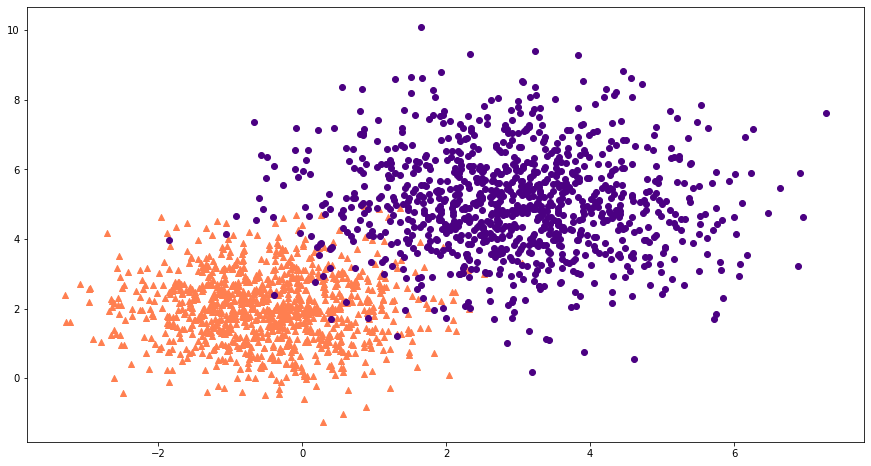

In [21]:
plt.scatter(x1[:, 0], x1[:, 1], marker = '^', color='coral')
plt.scatter(x2[:, 0], x2[:, 1], marker = 'o', color='indigo')

In [22]:
X = np.concatenate([x1, x2])
y = np.array([0]*1000 + [1]*1000)

In [23]:
# plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [24]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
def plot_decision_regions(X, y, classifier, resolution=0.01):
    # set up markers and colors
    markers = ('x', 'o')
    colors = ('purple', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # return a meshgrid of solution
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.transpose(np.array([xx1.ravel(), xx2.ravel()])))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # show results on the plot
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, color=cmap(idx), marker=markers[idx], label=c1)

<span style="color:blue">Logistic regression is a simple machine learning algorith that is used for binary classification. Let's implement it. And for achieving this we need to implement some functions and pass through some steps.  </span>

$$z^{(i)} = w^T x^{(i)} + b $$
$$\hat{y}^{(i)} = sigmoid(z^{(i)})$$
$$\mathcal{L}(\hat{y}^{(i)}, y^{(i)}) =  - y^{(i)}  \log(\hat{y}^{(i)}) - (1-y^{(i)} )  \log(1-\hat{y}^{(i)})$$
$$ J(w, b) = \frac{1}{n} \sum_{i=1}^n \mathcal{L}(\hat{y}^{(i)}, y^{(i)})$$

<span style="color:blue">We need to optimize parameters $w$ and $b$ and we'll use gradient descent for this.  </span>  

$$ \frac{\partial J}{\partial w} = \frac{1}{n}X(\hat{Y}-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\hat{y}^{(i)}-y^{(i)})$$  
<span style="color:blue">And it's a classification task so $x^{(i)}$ will belong to calss 1 if $\hat{y}^{(i)}\geq 0.5$ </span>

In [27]:
class LogisticRegression():
    def __init__(self, learning_rate=0.4, num_iter=10000, verbose=False):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.verbose = verbose
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def propagate(self, X, y):
        y_hat = self.sigmoid(X.dot(self.theta) + self.b)

        cost = -(np.multiply(y, np.log(y_hat)) + np.multiply(1-y, np.log(1-y_hat))).mean()

        dtheta = np.dot(X.T, (y_hat - y)) / X.shape[0]
        db = np.sum(y_hat - y) / X.shape[0]
        
        cost = np.squeeze(cost)
        
        return dtheta, db, cost
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1]) # weights initialization
        self.b = 0
        for i in range(self.num_iter):
            dtheta, db, cost = self.propagate(X, y)
            self.theta -= self.learning_rate * dtheta
            self.b -= self.learning_rate * db
            if(self.verbose == True and i % 100 == 0):
                print(f'loss: {cost} \t')
    
    def predict(self, X):
        y_hat = self.sigmoid(X.dot(self.theta) + self.b)
        y_pred = np.where(y_hat >= 0.5, 1, 0)
        return y_pred
    
    def score(self, X, y_test):
        y_pred_test = self.predict(X)
        return accuracy_score(y_pred_test, y_test)
        #return 100 - np.mean(np.abs(y_pred_test - y_test))*100

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

In [29]:
print('Accuracy:', accuracy)

Accuracy: 0.9716666666666667


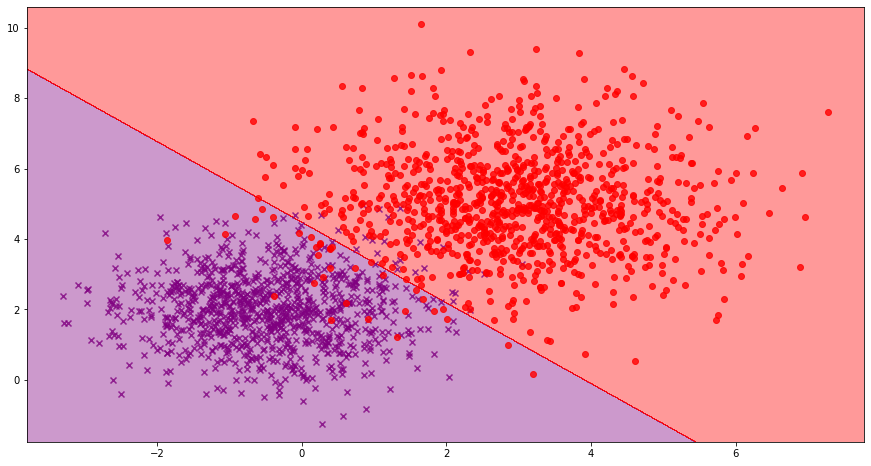

In [30]:
plot_decision_regions(X, y, model, resolution=0.01)